In [1]:
#Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import glob
import datetime
import warnings
warnings.filterwarnings("ignore")

### Data quality is awful, will have to work one file at a time to fix the dates first
* Combining them and then trying to edit the dates just wouldn't work because there'd be no way to be 100% sure if the month and days flipped unless we look at them season by season
* Had to inspect the CSV to figure out what was going on (too many columns/blank values, etc.)

In [335]:
#List all csv files only
csv_files = glob.glob('data/*.{}'.format('csv'))

In [336]:
#Need to store them in separate dataframe for now
fns = [os.path.splitext(os.path.basename(x))[0] for x in csv_files]

In [337]:
d = {} #create a dictionary of dataframes
for i in range(len(fns)):
    d[fns[i]] = pd.read_csv(csv_files[i], encoding = 'unicode_escape')

In [338]:
list(d.keys())

['2003-2004',
 '2004-2005',
 '2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019',
 '2019-2020',
 '2020-2021',
 '2021-2022']

In [339]:
#Give different names to dataframe
df_0304 = d['2003-2004']
df_0405 = d['2004-2005']
df_0506 = d['2005-2006']
df_0607 = d['2006-2007']
df_0708 = d['2007-2008']
df_0809 = d['2008-2009']
df_0910 = d['2009-2010']
df_1011 = d['2010-2011']
df_1112 = d['2011-2012']
df_1213 = d['2012-2013']
df_1314 = d['2013-2014']
df_1415 = d['2014-2015']
df_1516 = d['2015-2016']
df_1617 = d['2016-2017']
df_1718 = d['2017-2018']
df_1819 = d['2018-2019']
df_1920 = d['2019-2020']
df_2021 = d['2020-2021']
df_2122 = d['2021-2022']
#list(d.keys())[i][2:4]+list(d.keys())[i][7:9]

### For now, take a look at the first df

In [340]:
df_0304.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365<2.5,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AHH,B365AHA,B365AH
0,E0,16/08/03,Arsenal,Everton,2,1,H,1,0,H,...,2.10,1.90,1.90,-1.25,1.90,1.95,-1.25,1.975,1.925,-1.25
1,E0,16/08/03,Birmingham,Tottenham,1,0,H,1,0,H,...,1.85,2.05,1.75,-0.25,1.75,2.10,0.00,2.100,1.800,-0.25
2,E0,16/08/03,Blackburn,Wolves,5,1,H,2,0,H,...,1.90,1.95,1.85,-0.75,2.00,1.85,-0.75,1.950,1.950,-0.75
3,E0,16/08/03,Fulham,Middlesbrough,3,2,H,1,1,D,...,1.70,1.80,2.00,0.00,1.85,2.00,0.00,2.100,1.800,-0.25
4,E0,16/08/03,Leicester,Southampton,2,2,D,2,0,H,...,1.80,1.85,1.95,0.00,1.85,2.00,0.00,1.850,2.050,0.00


In [341]:
#None of them have the full year, we want the MM/DD/YYYY format
df_0304['Date'].str.len().value_counts()

8    380
Name: Date, dtype: int64

#### Data Transformations

In [342]:
#subset columns
#df_0304 = df_0304[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

In [343]:
#Switch Month and Day locations to make it into MM/DD/YYYY
#Notice the years are 4 digits now
#df_0304['Date'] = pd.to_datetime(df_0304['Date']).dt.strftime('%m/%d/%Y')

In [344]:
#df_0304.head()

In [345]:
#All rows have the full, 4 digit year
#df_0304['Date'].str.len().value_counts()

In [346]:
#df_0405.head(1) #0405 can take on the same transformation

In [347]:
#df_0405['date'] = df_0405['date'].apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y %H:%M:%S'))
#df_0405['Date'] = pd.to_datetime(df_0405['Date'], dayfirst=True) #need the day first argument here so it doesn't flip days/months when day is less than 13

#### Now, subset the columns and change date format in all DFs using a loop

In [348]:
df_list = [df_0304,df_0405,df_0506,df_0607,df_0708,df_0809,df_0910,df_1011,df_1112,df_1213,df_1314,
          df_1415,df_1516,df_1617,df_1718,df_1819,df_1920,df_2021,df_2122]

#### A lot of columns were empty or not as relevant

In [349]:
#For subsetting the columns
for i in range(len(df_list)):
    cols = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Referee']
    df_list[i] = df_list[i][cols]
    df_list[i]['Date'] = pd.to_datetime(df_list[i]['Date'], dayfirst=True) 
    ##standardize dates keeping in mind that day comes first in all of these dates (verified after checking manually)

In [350]:
#check if this data looks ok and consistent
for i in range(len(df_list)):
    print(df_list[i].head())

        Date    HomeTeam       AwayTeam  FTHG  FTAG FTR  HS  AS  HST  AST  HF  \
0 2003-08-16     Arsenal        Everton     2     1   H  11  13    5    7   8   
1 2003-08-16  Birmingham      Tottenham     1     0   H  10  15    5    7  20   
2 2003-08-16   Blackburn         Wolves     5     1   H  25   8   13    5   8   
3 2003-08-16      Fulham  Middlesbrough     3     2   H  17   8    9    5  18   
4 2003-08-16   Leicester    Southampton     2     2   D  12  13    7   10  27   

   AF  HC  AC  HY  AY  HR  AR   Referee  
0  15   6   9   1   3   1   1  M Halsey  
1  27   1   4   3   5   0   0  R Styles  
2  14   6   2   1   1   0   0  J Winter  
3  16   7   6   1   1   0   0    G Poll  
4  15   2   7   3   1   0   0   M Riley  
        Date       HomeTeam     AwayTeam  FTHG  FTAG FTR  HS  AS  HST  AST  \
0 2004-08-14    Aston Villa  Southampton     2     0   H  14   6    5    2   
1 2004-08-14      Blackburn    West Brom     1     1   D  12   4    4    2   
2 2004-08-14         Bolton

#### Concatenate dataframes in a list

In [351]:
df = pd.concat(df_list) #simple!

In [352]:
df.shape

(7221, 19)

In [353]:
7221/19 #around 380 games per season. We're looking at 19 seasons here

380.05263157894734

In [354]:
#one row with nulls
df[df['Date'].isna()] #but we can safely ignore this row

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
380,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
df = df[df['Date'].notna()]

In [356]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
0,2003-08-16,Arsenal,Everton,2.0,1.0,H,11.0,13.0,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0,M Halsey
1,2003-08-16,Birmingham,Tottenham,1.0,0.0,H,10.0,15.0,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0,R Styles
2,2003-08-16,Blackburn,Wolves,5.0,1.0,H,25.0,8.0,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0,J Winter
3,2003-08-16,Fulham,Middlesbrough,3.0,2.0,H,17.0,8.0,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0,G Poll
4,2003-08-16,Leicester,Southampton,2.0,2.0,D,12.0,13.0,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0,M Riley


In [357]:
df.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG               float64
FTAG               float64
FTR                 object
HS                 float64
AS                 float64
HST                float64
AST                float64
HF                 float64
AF                 float64
HC                 float64
AC                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
Referee             object
dtype: object

In [358]:
#Check dates
df['Date'].min() 

Timestamp('2003-08-16 00:00:00')

In [359]:
df['Date'].max() #looks about right

Timestamp('2022-05-22 00:00:00')

In [360]:
df['month_year'] = df['Date'].dt.to_period('M')

In [361]:
#df[df['month_year']== '2022-05']

In [362]:
df.shape

(7220, 20)

In [363]:
print(df.columns)

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS',
       'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Referee',
       'month_year'],
      dtype='object')


In [364]:
#df.to_csv('test.csv')

In [365]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS',
       'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Referee',
       'month_year'],
      dtype='object')

In [366]:
df.dtypes

Date          datetime64[ns]
HomeTeam              object
AwayTeam              object
FTHG                 float64
FTAG                 float64
FTR                   object
HS                   float64
AS                   float64
HST                  float64
AST                  float64
HF                   float64
AF                   float64
HC                   float64
AC                   float64
HY                   float64
AY                   float64
HR                   float64
AR                   float64
Referee               object
month_year         period[M]
dtype: object

# Analyzing basic football stats: Most Wins, Most Goals Scored, Most Goals Conceeded since '03

* Will need to do some data manipulation

In [367]:
#1. create a "Winning Team" column
def f(row):
    if row['FTR'] == 'H': #Winning Team is the home team
        val = row['HomeTeam']
    elif row['FTR'] == 'A': #Winning Team is the away team
        val = row['AwayTeam']
    else: #Otherwise, the result is a draw
        val = 'Draw'
    return val


In [368]:
df['WinningTeam'] = df.apply(f, axis=1)

In [369]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AF,HC,AC,HY,AY,HR,AR,Referee,month_year,WinningTeam
0,2003-08-16,Arsenal,Everton,2.0,1.0,H,11.0,13.0,5.0,7.0,...,15.0,6.0,9.0,1.0,3.0,1.0,1.0,M Halsey,2003-08,Arsenal
1,2003-08-16,Birmingham,Tottenham,1.0,0.0,H,10.0,15.0,5.0,7.0,...,27.0,1.0,4.0,3.0,5.0,0.0,0.0,R Styles,2003-08,Birmingham
2,2003-08-16,Blackburn,Wolves,5.0,1.0,H,25.0,8.0,13.0,5.0,...,14.0,6.0,2.0,1.0,1.0,0.0,0.0,J Winter,2003-08,Blackburn
3,2003-08-16,Fulham,Middlesbrough,3.0,2.0,H,17.0,8.0,9.0,5.0,...,16.0,7.0,6.0,1.0,1.0,0.0,0.0,G Poll,2003-08,Fulham
4,2003-08-16,Leicester,Southampton,2.0,2.0,D,12.0,13.0,7.0,10.0,...,15.0,2.0,7.0,3.0,1.0,0.0,0.0,M Riley,2003-08,Draw


## Teams with the Most Wins from 03/04 to end of 21/22 Season

In [370]:
df['WinningTeam'].value_counts().head(10) #The Big Six Theory is validated?!

Draw          1793
Chelsea        439
Man United     434
Man City       405
Liverpool      402
Arsenal        401
Tottenham      352
Everton        282
Newcastle      204
West Ham       203
Name: WinningTeam, dtype: int64

In [371]:
df_wins_since03 = df.groupby(['WinningTeam']).size().sort_values(ascending=False).reset_index(name='Number of Wins')

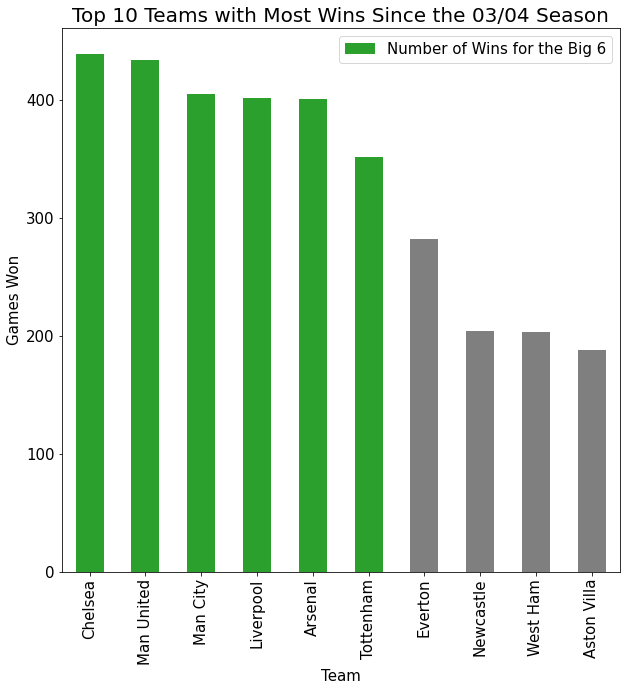

In [372]:
#Ignore the draws
#Highlight the Big 6
colors = ['#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c','#2ca02c', 
          '#7f7f7f', '#7f7f7f', '#7f7f7f', '#7f7f7f']
ax = df_wins_since03[df_wins_since03['WinningTeam']!='Draw'][:10].plot('WinningTeam','Number of Wins', 
                                                                       kind='bar',
                                                                       color = colors, figsize=(10,10), 
                                                                       label='Number of Wins for the Big 6',
                                                                      fontsize=15)
ax.set_title("Top 10 Teams with Most Wins Since the 03/04 Season", fontsize=20)
ax.set_xlabel("Team", fontsize=15)
ax.set_ylabel("Games Won", fontsize=15)
ax.legend(fontsize=15)

## Teams with the Most Goals

In [373]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AF,HC,AC,HY,AY,HR,AR,Referee,month_year,WinningTeam
0,2003-08-16,Arsenal,Everton,2.0,1.0,H,11.0,13.0,5.0,7.0,...,15.0,6.0,9.0,1.0,3.0,1.0,1.0,M Halsey,2003-08,Arsenal
1,2003-08-16,Birmingham,Tottenham,1.0,0.0,H,10.0,15.0,5.0,7.0,...,27.0,1.0,4.0,3.0,5.0,0.0,0.0,R Styles,2003-08,Birmingham
2,2003-08-16,Blackburn,Wolves,5.0,1.0,H,25.0,8.0,13.0,5.0,...,14.0,6.0,2.0,1.0,1.0,0.0,0.0,J Winter,2003-08,Blackburn
3,2003-08-16,Fulham,Middlesbrough,3.0,2.0,H,17.0,8.0,9.0,5.0,...,16.0,7.0,6.0,1.0,1.0,0.0,0.0,G Poll,2003-08,Fulham
4,2003-08-16,Leicester,Southampton,2.0,2.0,D,12.0,13.0,7.0,10.0,...,15.0,2.0,7.0,3.0,1.0,0.0,0.0,M Riley,2003-08,Draw


In [374]:
#Create a new dataframe pairing team name (column 1) + goals (column 2)
df_home = df[['Date','HomeTeam','FTHG']]
df_home

,Date,HomeTeam,FTHG
0,2003-08-16,Arsenal,2.0
1,2003-08-16,Birmingham,1.0
2,2003-08-16,Blackburn,5.0
3,2003-08-16,Fulham,3.0
4,2003-08-16,Leicester,2.0
...,...,...,...
375,2022-05-22,Crystal Palace,1.0
376,2022-05-22,Leicester,4.0
377,2022-05-22,Liverpool,3.0
378,2022-05-22,Man City,3.0


In [375]:
#Do the same for away team
df_away = df[['Date','AwayTeam','FTAG']]
df_away

,Date,AwayTeam,FTAG
0,2003-08-16,Everton,1.0
1,2003-08-16,Tottenham,0.0
2,2003-08-16,Wolves,1.0
3,2003-08-16,Middlesbrough,2.0
4,2003-08-16,Southampton,2.0
...,...,...,...
375,2022-05-22,Man United,0.0
376,2022-05-22,Southampton,1.0
377,2022-05-22,Wolves,1.0
378,2022-05-22,Aston Villa,2.0


In [376]:
#Match the column names then concatenate the two frames
df_home.columns = ['Date','Team','Goals']
df_away.columns = ['Date','Team','Goals']

In [377]:
df_goals = pd.concat([df_home,df_away])
df_goals

,Date,Team,Goals
0,2003-08-16,Arsenal,2.0
1,2003-08-16,Birmingham,1.0
2,2003-08-16,Blackburn,5.0
3,2003-08-16,Fulham,3.0
4,2003-08-16,Leicester,2.0
...,...,...,...
375,2022-05-22,Man United,0.0
376,2022-05-22,Southampton,1.0
377,2022-05-22,Wolves,1.0
378,2022-05-22,Aston Villa,2.0


In [378]:
df_goals_since03 = df_goals.groupby('Team').sum().sort_values(by='Goals', ascending=False).reset_index() #The Big 6 wins again! 
#"You need to score goals to win football matches"

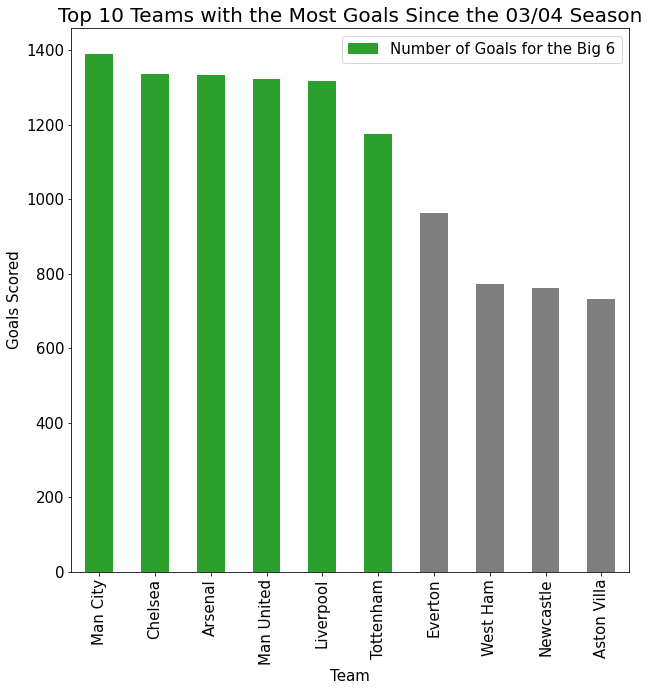

In [379]:
#Ignore the draws
colors = ['#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c','#2ca02c', 
          '#7f7f7f', '#7f7f7f', '#7f7f7f', '#7f7f7f']
ax = df_goals_since03.head(10).plot("Team","Goals",
                                    kind='bar',
                                    color=colors, 
                                    figsize=(10,10),
                                    label='Number of Goals for the Big 6',
                                    fontsize=15)
ax.set_title("Top 10 Teams with the Most Goals Since the 03/04 Season", fontsize=20)
ax.set_xlabel("Team", fontsize=15)
ax.set_ylabel("Goals Scored", fontsize=15)
ax.legend(fontsize=15)

### Random check on Referees

In [380]:
df['Referee'].value_counts() #Mike Dean refereed the most # of games.

M Dean          508
M Atkinson      459
A Marriner      379
M Oliver        320
A Taylor        314
               ... 
 N Barry          1
 S Dunn           1
D Gallagh         1
D Gallaghe        1
I Williamson      1
Name: Referee, Length: 74, dtype: int64

Text(0, 0.5, 'Number of Games')

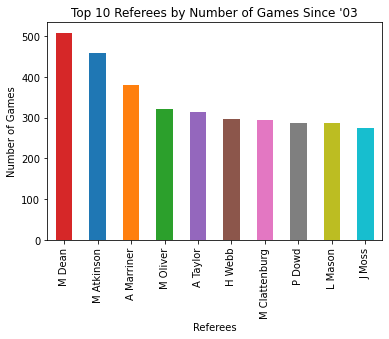

In [381]:
colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = df['Referee'].value_counts()[:10].plot.bar(color=colors) #Some familiar looking names...
ax.set_title("Top 10 Referees by Number of Games Since '03")
ax.set_xlabel("Referees")
ax.set_ylabel("Number of Games")

### For ease, have a combined dataset stored somewhere

In [382]:
df.to_csv('data/EPL_stats_since03.csv',index=False)